## Nama : Ashadi Permana
## NIM : 2209106033
## Kelas Praktikum : A22

## <b>LINK DATASET CITRA : https://www.kaggle.com/datasets/just1ce5/genshin-impact-characters-dataset/data?select=dataset </b>

## <b>POSTTEST 7 KB</b>

### import library tensorflow dan keras untuk mengelola dataset citra dan import os untuk mengelola direktori

In [1]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns

### MEMBACA BERKAS

In [2]:
img_path = 'D:\IT BARU\KB\KB\Posttest_KB_7\genshin_dataset'

### mengambil daftar semua file dan direktori yang ada dalam direktori yang ditentukan

In [3]:
os.listdir(img_path)

['Albedo', 'Ayaka', 'Hu Tao', 'Kokomi', 'Neither']

### Split dataset menjadi train,val dan test 



In [4]:
from sklearn.model_selection import train_test_split
import shutil

In [5]:

# Tentukan jalur awal gambar
train_dir = 'D:/IT BARU/KB/KB/Posttest_KB_7/train/'
val_dir = 'D:/IT BARU/KB/KB/Posttest_KB_7/valid/'
test_dir = 'D:/IT BARU/KB/KB/Posttest_KB_7/test/'

# Membuat direktori train, val, dan test
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Memisahkan data menjadi train (70%), val (15%), dan test (15%)
all_images = os.listdir(img_path)
train_images, test_images = train_test_split(all_images, test_size=0.3, random_state=42)
val_images, test_images = train_test_split(test_images, test_size=0.5, random_state=42)

# Untuk Memindahkan gambar ke direktori yang sesuai
for img in train_images:
    shutil.move(os.path.join(img_path, img), os.path.join(train_dir, img))

for img in val_images:
    shutil.move(os.path.join(img_path, img), os.path.join(val_dir, img))

for img in test_images:
    shutil.move(os.path.join(img_path, img), os.path.join(test_dir, img))


###  Melakukan data augmentation dengan image data generator

In [6]:
# Dimensi gambar
img_width, img_height = 150, 150 

# Jumlah batch yang digunakan dalam pelatihan dan validasi
batch_size = 32

# Jumlah epoch
epochs = 10

# Inisialisasi ImageDataGenerator untuk augmentasi data
img_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalisasi nilai piksel
    validation_split = 0.1, #secara otomatis membagi dataset menjadi subset train dan validation berdasarkan persentase yang ditentukan
    rotation_range=20,  # Rotasi gambar
    width_shift_range=0.2,  # Geser gambar secara horizontal
    height_shift_range=0.2,  # Geser gambar secara vertikal
    shear_range=0.2,  # Transformasi shear
    zoom_range=0.2,  # Perbesaran gambar
    horizontal_flip=True,  # Flip horizontal
    fill_mode='nearest'
)

### Membuat arsitektur model

In [7]:

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(img_width,img_height,3)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(3,activation="softmax")
])

### mengompilasi model dan menentukan metrik

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### melakukan modeling dengan train , val , test

In [9]:
train_generator = img_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    subset ='training',
    class_mode='categorical'
)

validation_generator = img_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

test_generator = img_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 270 images belonging to 3 classes.
Found 10 images belonging to 1 classes.
Found 100 images belonging to 1 classes.


### Pelatihan model dan menyimpan riwayat

In [10]:
history = model.fit(train_generator,
                 validation_data = validation_generator,
                 epochs=epochs
                  )

Epoch 1/10
9/9 [==============================] - 13s 1s/step - loss: 1.4052 - accuracy: 0.4704 - val_loss: 3.7001 - val_accuracy: 0.3000
Epoch 2/10
9/9 [==============================] - 10s 1s/step - loss: 0.9759 - accuracy: 0.5481 - val_loss: 4.1246 - val_accuracy: 0.4000
Epoch 3/10
9/9 [==============================] - 10s 1s/step - loss: 0.7068 - accuracy: 0.6259 - val_loss: 4.3665 - val_accuracy: 0.2000
Epoch 4/10
9/9 [==============================] - 10s 1s/step - loss: 0.6185 - accuracy: 0.7000 - val_loss: 5.8085 - val_accuracy: 0.1000
Epoch 5/10
9/9 [==============================] - 10s 1s/step - loss: 0.5603 - accuracy: 0.7778 - val_loss: 5.9535 - val_accuracy: 0.5000
Epoch 6/10
9/9 [==============================] - 10s 1s/step - loss: 0.4767 - accuracy: 0.7778 - val_loss: 5.7153 - val_accuracy: 0.5000
Epoch 7/10
9/9 [==============================] - 10s 1s/step - loss: 0.4133 - accuracy: 0.8111 - val_loss: 6.2336 - val_accuracy: 0.6000
Epoch 8/10
9/9 [==================

### Melakukan evaluasi model terhadap data test 

In [11]:
# Evaluasi model terhadap data tes
test_loss, test_accuracy = model.evaluate(test_generator)

# Cetak hasil evaluasi
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


4/4 [==============================] - 1s 336ms/step - loss: 9.7875 - accuracy: 0.5200
Test Loss: 9.787544250488281
Test Accuracy: 0.5199999809265137


## Membuat grafik yang menampilkan pergerakan metrik (akurasi/error) dan loss terhadap epoch baik pada training maupun validation

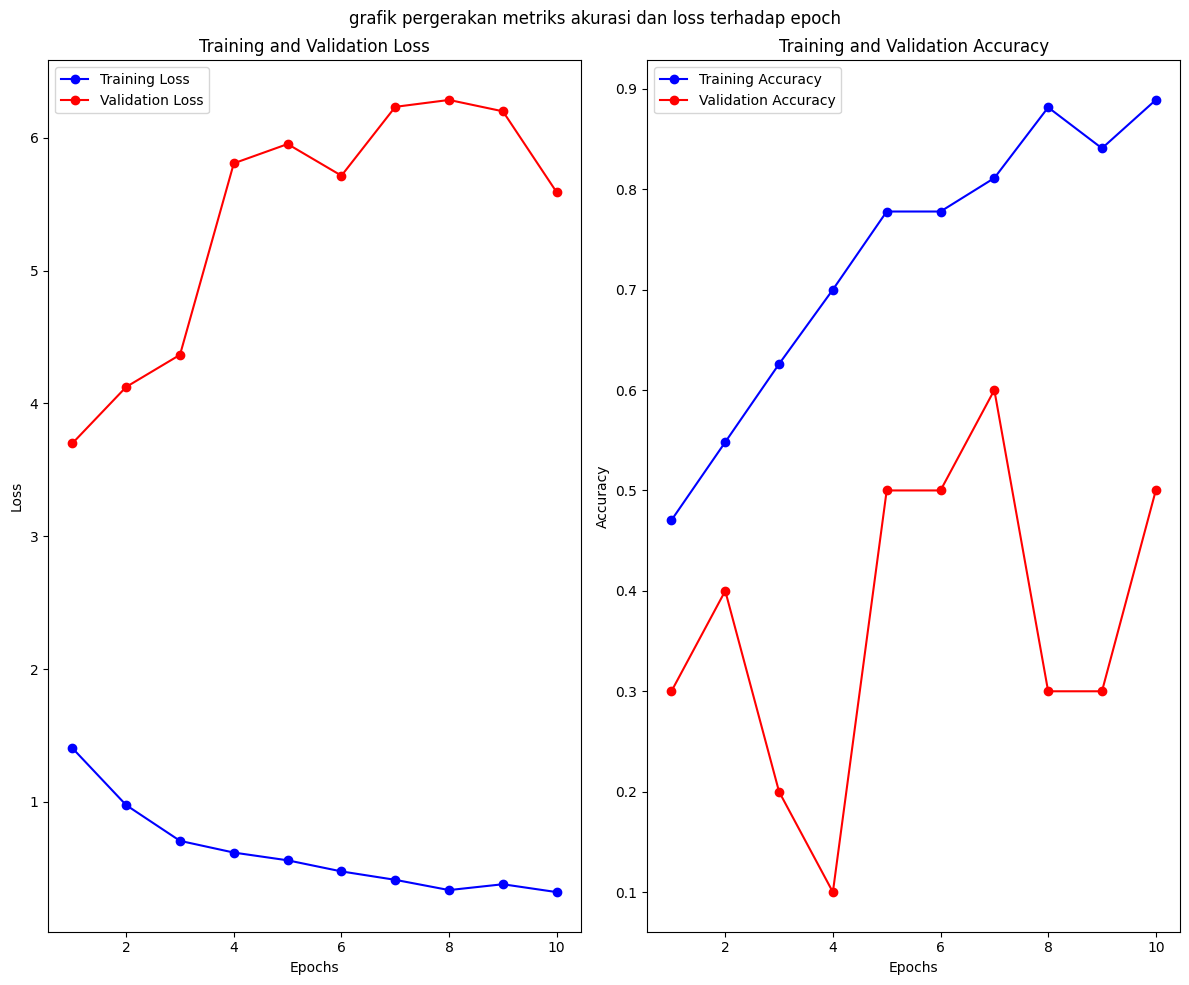

In [12]:

# Ambil data pelatihan
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']

# Ambil data validasi
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Jumlah epoch
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 10))
plt.suptitle('grafik pergerakan metriks akurasi dan loss terhadap epoch')

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot akurasi
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()